In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import librosa
import librosa.display
import parselmouth

In [33]:
class RaagAnalysis:
    
    def MelSpectrogram(self, x):
        samples, sampling_rate = librosa.load('Malkauns_JaakoManaRaam_fast.wav')
        m = librosa.feature.melspectrogram(samples, sr=sampling_rate, n_mels=128)
        log_m = librosa.power_to_db(m, ref=np.max)
        plt.figure(figsize=(17,8))
        librosa.display.specshow(log_m, sr=sampling_rate, x_axis='time', y_axis='mel')
        plt.title('Mel Spectrogram')
        plt.xlabel('Time [seconds]')
        plt.ylabel('Frequency_Mel scale [Hz]')
        plt.show()
    
    def PitchContour(self, x):
        song=parselmouth.Sound(x)
        pitch=song.to_pitch()
        pitch_values=pitch.selected_array['frequency']
        pitch_values[pitch_values==0]=np.nan
        plt.figure(figsize=(17,8))
        plt.plot(pitch.xs(), pitch_values, linewidth=1, color='blue')
        plt.xlim([song.xmin, song.xmax])
        plt.ylim(0, pitch.ceiling)
        plt.title('Pitch Contour')
        plt.xlabel('Time [seconds]')
        plt.ylabel('Frequency_Mel scale [Hz]')
        plt.show()
    
    def MelSpec_Pitch(self, x):
        samples, sampling_rate = librosa.load(x)
        m = librosa.feature.melspectrogram(samples, sr=sampling_rate, n_mels=128)
        log_m = librosa.power_to_db(m, ref=np.max)
        song=parselmouth.Sound(x)
        pitch=song.to_pitch()
        pitch_values=pitch.selected_array['frequency']
        pitch_values[pitch_values==0]=np.nan
        plt.figure(figsize=(17,8))
        librosa.display.specshow(log_m, sr=sampling_rate, x_axis='time', y_axis='mel')
        plt.plot(pitch.xs(), pitch_values, linewidth=2, color='black')
        plt.xlim([song.xmin, song.xmax])
        plt.title('Mel Spectrogram and Pitch Contour overlapped')
        plt.xlabel('Time [seconds]')
        plt.ylabel('Frequency_Mel scale [Hz]')
        plt.show()

In [34]:
s='Malkauns_JaakoManaRaam_fast.wav'

In [35]:
raag = RaagAnalysis()

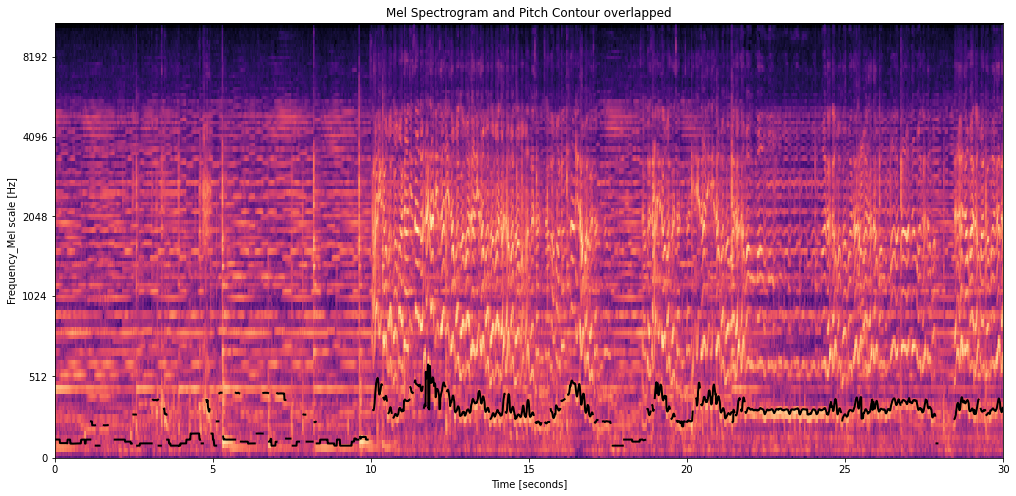

In [36]:
raag.MelSpec_Pitch(s)

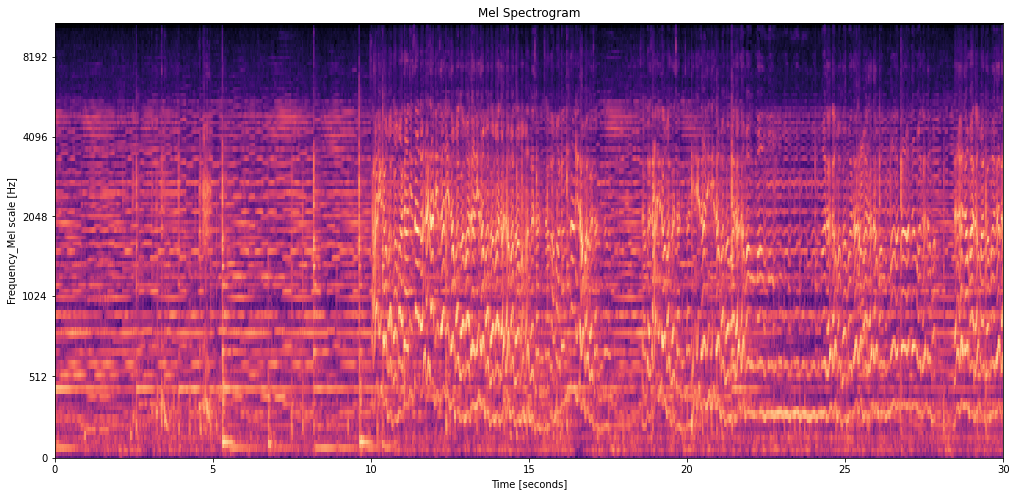

In [27]:
raag.MelSpectrogram(s)

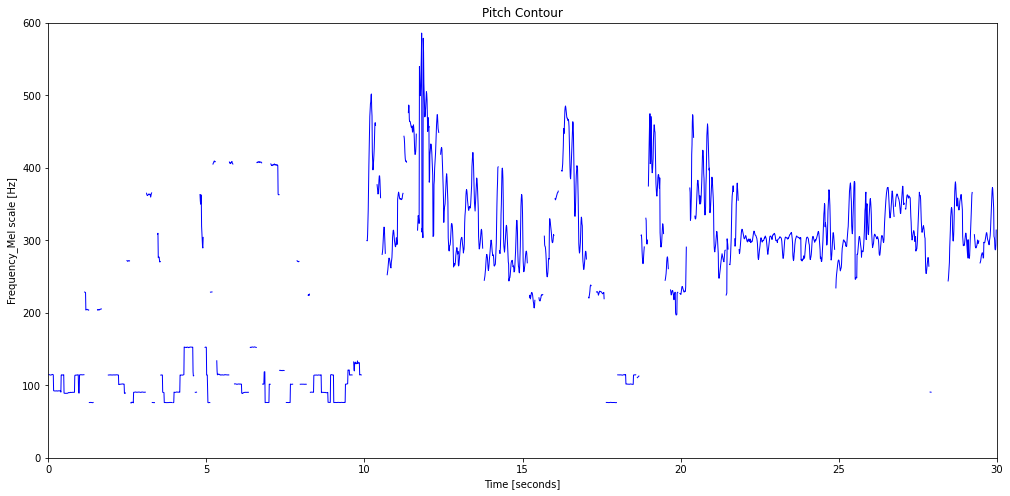

In [28]:
raag.PitchContour(s)